In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [6]:
data = pd.read_csv('insurence.txt')

In [7]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
#data.size returns rows*columns (multiply).
#data.shape returns the tuple of no. of rows and columns.
#data.ndim returns dimension of data that is weather it 1D,2D,3D.
print(data.size, data.shape, data.ndim)

9366 (1338, 7) 2


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
#Chech which properties have high relation with the each feature in the data
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [14]:
#relation between age column and charges column using 'pearson' method
data['age'].corr(data['charges'], method="pearson")

0.29900819333064765

<h5><font color='green'>Both gives the same correlattion between age and charges column.<br>That is 0.29900819333</font></h5>

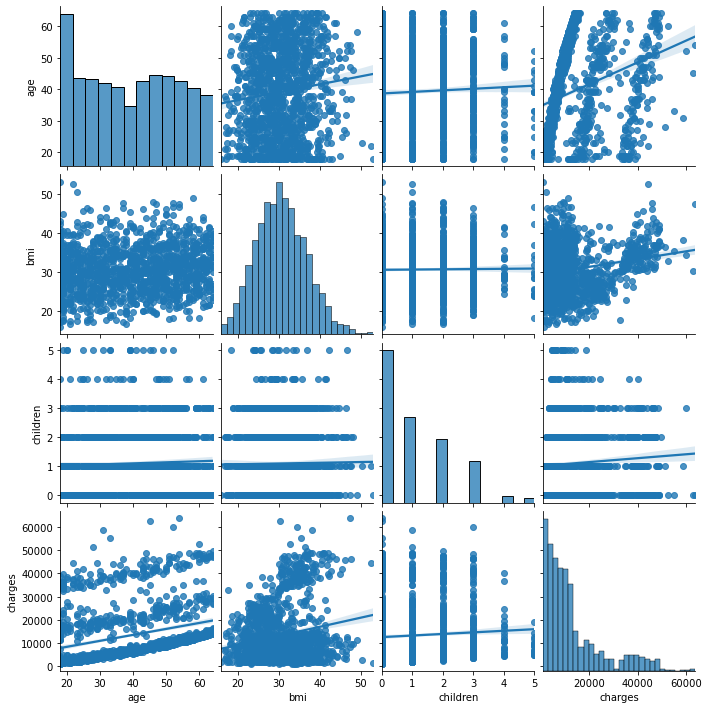

In [15]:
#plot the pair plot between the features.
sns.pairplot(data,kind='reg')
plt.show()

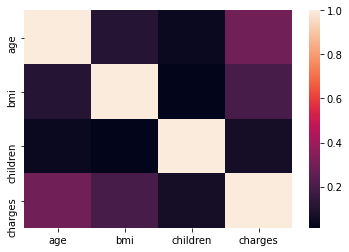

In [16]:
#Here we will plot the heat map to clearly see the correlation betwween the variables
#Correlation tells how strongly our features are related or depends on each other
#0(zero) correlation means there is no relation between the features +1 or -1 means that they are highly dependent

sns.heatmap(data.corr())
plt.show()

In [17]:
#Now we will assign lavel and features to variables
y = data['charges']
x = data.drop('charges', axis = 1)

In [20]:
#This would creates dummies for columns such as assigns 0 for male and 1 for female
x = pd.get_dummies(x, drop_first = True)
x.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [21]:
#Here we are spliting data into training and testing dataset
#We are keeping 70% of the data for training our model and 30% for testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=1)

In [22]:
#Here we are creating Linear Regressin model from sklearn
#And fitting our data into the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#Assigning value to attributes of the model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

LinearRegression()

In [25]:
#Here we are predicting the test dataset
y_pred = lr.predict(x_test)

In [27]:
#Now we will see the error or deviation in our prediction or how good our model is at prediction.
#Also creating dataframe for the same to see clearly and analysee
error = y_test-y_pred
table = pd.DataFrame({'Actual':y_test,'predicted':y_pred,'Error':error})
table.head()

,Actual,predicted,Error
559,1646.4297,4610.315541,-2963.885841
1087,11353.2276,12887.893880,-1534.666280
1020,8798.5930,12573.948752,-3775.355752
460,10381.4787,13197.836626,-2816.357926
802,2103.0800,629.337182,1473.742818


In [28]:
#Here we want ot see the intercept and coefficient for the model
print('Intercept: ', lr.intercept_)
print('Coefficient: ', lr.coef_)

Intercept:  -11039.238418561546
Coefficient:  [  251.68186515   322.38910684   344.9642553   -282.79634661
 24059.39047692  -304.09009765  -939.34209691  -868.18855866]


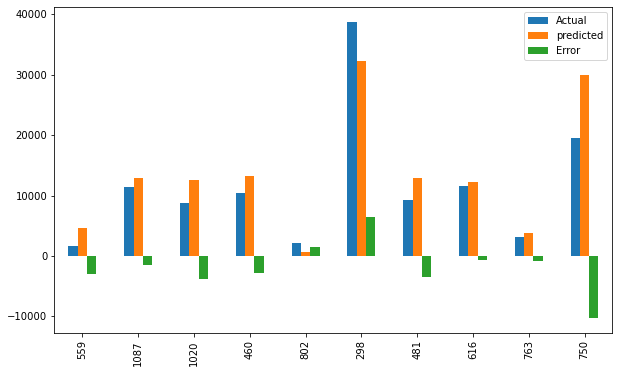

In [30]:
#Here are plotting the bar graph of small amount of data
sTable = table.head(10)
sTable.plot(kind='bar', figsize = (10,6))
plt.show()

In [ ]:
#Now we will calculate the accuracy of our model using RMSE(Root Mean Square Error)

from sklearn.metrics import mean_squared_error
print('RMSE:', np.sqrt(mean_squared_error()))